In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_uniqune=pd.read_csv("../data/cleaned_data.csv")

In [3]:
summary = df_uniqune[['game_name', 'highest_price', 'metacritic_user_rating_count']]
summary

,game_name,highest_price,metacritic_user_rating_count
0,Grand Theft Auto IV,25,5541.0
1,Red Dead Redemption 2,60,31932.0
2,Red Dead Online,70,31932.0
3,Grand Theft Auto 3,10,2079.0
4,Grand Theft Auto V,70,14322.0
...,...,...,...
3265,SENRAN KAGURA Burst Re:Newal,40,65.0
3266,Smash Hit Plunder,30,65.0
3267,FOX n FORESTS,20,65.0
3268,DYNASTY WARRIORS 9,70,65.0


In [4]:
summary.sort_values(by='highest_price', ascending=True)

,game_name,highest_price,metacritic_user_rating_count
38,Street Fighter IV,0,5768.0
370,Marvel's Spider-Man: Miles Morales PS4 & PS5,0,823.0
397,The Wolf Among Us - Episode 1: Faith,0,16.0
14,Portal 2,0,2649.0
396,Lara Croft and the Guardian of Light,0,16.0
...,...,...,...
1617,Kingdom Come: Deliverance,10000,578.0
1311,Amnesia: Collection,10000,250.0
2143,My Time at Portia,10000,131.0
2142,RAGE 2,10000,921.0


In [5]:
df_uniqune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_name                     3270 non-null   object 
 1   highest_price                 3270 non-null   int64  
 2   release_date                  3270 non-null   object 
 3   genre                         3270 non-null   object 
 4   publisher                     3270 non-null   object 
 5   platform                      3270 non-null   object 
 6   metacritic_score              3270 non-null   float64
 7   metacritic_rating_count       3270 non-null   float64
 8   metacritic_user_score         3270 non-null   float64
 9   metacritic_user_rating_count  3270 non-null   float64
 10  playstation_score             3270 non-null   object 
 11  playstation_rating_count      3270 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 306.7+ KB


In [6]:
df_uniqune.head()

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count
0,Grand Theft Auto IV,25,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904.0
1,Red Dead Redemption 2,60,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257.0
2,Red Dead Online,70,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346.0
3,Grand Theft Auto 3,10,"Oct 4, 2012",--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437.0
4,Grand Theft Auto V,70,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895.0


In [7]:
df_uniqune["total_users"]=df_uniqune["metacritic_user_rating_count"] + df_uniqune["playstation_rating_count"]
df_uniqune.head()

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count,total_users
0,Grand Theft Auto IV,25,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904.0,54445.0
1,Red Dead Redemption 2,60,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257.0,411189.0
2,Red Dead Online,70,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346.0,411278.0
3,Grand Theft Auto 3,10,"Oct 4, 2012",--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437.0,3516.0
4,Grand Theft Auto V,70,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895.0,55217.0


In [30]:
df_uniqune["playstation_score"]=pd.to_numeric(df_uniqune['playstation_score'].fillna(0),errors='coerce')

In [31]:
df_uniqune['user_score_100'] = df_uniqune['metacritic_user_score'] * 10
df_uniqune['playstation_score_100'] = df_uniqune['playstation_score'] * 10


In [32]:
df_uniqune['total_rating'] = (
    (df_uniqune['metacritic_score'] * df_uniqune['metacritic_rating_count']) +
    (df_uniqune['user_score_100'] * df_uniqune['metacritic_user_rating_count']) +
    (df_uniqune['playstation_score_100'] * df_uniqune['playstation_rating_count'])
) / (
    df_uniqune['metacritic_rating_count'] +
    df_uniqune['metacritic_user_rating_count'] +
    df_uniqune['playstation_rating_count']
)


In [33]:
df_uniqune.isna().sum()

game_name                       0
highest_price                   0
release_date                    0
genre                           0
publisher                       0
platform                        0
metacritic_score                0
metacritic_rating_count         0
metacritic_user_score           0
metacritic_user_rating_count    0
playstation_score               0
playstation_rating_count        0
total_users                     0
user_score_100                  0
playstation_score_100           0
total_rating                    0
isfree                          0
dtype: int64

In [34]:
df_sorted= df_uniqune.sort_values("total_rating",ascending=False)
df_sorted

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count,total_users,user_score_100,playstation_score_100,total_rating,isfree
13,The Last of Us™,0,"Apr 4, 2012",--,Sony Interactive Entertainment Europe,PS3,95.0,98.0,9.2,16454.0,4.35,113.0,16567.0,92.0,43.5,91.688779,True
31,Persona 4 Golden,20,"Jan 19, 2023",Role playing games,SEGA EUROPE LTD,PS4,93.0,61.0,9.1,2484.0,5.00,14.0,2498.0,91.0,50.0,90.823369,False
7,Uncharted 2: Among Thieves™,0,"Oct 15, 2009",--,Sony Interactive Entertainment Europe,PS3,96.0,105.0,8.9,7750.0,4.14,7.0,7757.0,89.0,41.4,89.051107,True
32,Resident Evil 4 PS4 & PS5,70,"Mar 24, 2023",Action / Adventure / Horror,CE EUROPE LIMITED,PS5 / PS4,93.0,126.0,8.9,6900.0,0.00,14.0,6914.0,89.0,0.0,88.894602,False
346,The Witcher 3: Wild Hunt – Complete Edition,50,"Dec 14, 2022",Action / Role playing games,CD PROJEKT,PS5 / PS4,85.0,65.0,8.9,2767.0,0.00,1.0,2768.0,89.0,0.0,88.876809,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,RESIDENT EVIL 7 biohazard Gold Edition,50,"Jun 13, 2022",Action / Adventure,CE EUROPE LIMITED,PS5 / PS4,86.0,4.0,0.0,0.0,0.00,55054.0,55054.0,0.0,0.0,0.006248,False
2083,Astronite,15,"Nov 30, 2022",Adventure,JANDUSOFT S.L.,PS5 / PS4,73.0,5.0,0.0,0.0,0.00,75454.0,75454.0,0.0,0.0,0.004837,False
2082,Kayak VR: Mirage,24,"Feb 22, 2023",Arcade / Racing / Simulation,Better Than Life B.V.,PS5,73.0,4.0,0.0,0.0,0.00,75454.0,75454.0,0.0,0.0,0.003870,False
2210,Adventure Bar Story,18,"Apr 24, 2024",--,"RideonJapan, Inc",PS5,72.0,7.0,0.0,0.0,0.00,218819.0,218819.0,0.0,0.0,0.002303,False


In [35]:
df_sorted = df_sorted[["game_name", "total_users","total_rating"]]
df_sorted

,game_name,total_users,total_rating
13,The Last of Us™,16567.0,91.688779
31,Persona 4 Golden,2498.0,90.823369
7,Uncharted 2: Among Thieves™,7757.0,89.051107
32,Resident Evil 4 PS4 & PS5,6914.0,88.894602
346,The Witcher 3: Wild Hunt – Complete Edition,2768.0,88.876809
...,...,...,...
284,RESIDENT EVIL 7 biohazard Gold Edition,55054.0,0.006248
2083,Astronite,75454.0,0.004837
2082,Kayak VR: Mirage,75454.0,0.003870
2210,Adventure Bar Story,218819.0,0.002303


In [36]:
tota_user_mean= df_sorted["total_users"].mean()
print(tota_user_mean)

7106.3330275229355


In [37]:
cum_total_rating= df_sorted["total_rating"].cummax()
print(cum_total_rating) 

13      91.688779
31      91.688779
7       91.688779
32      91.688779
346     91.688779
          ...    
284     91.688779
2083    91.688779
2082    91.688779
2210    91.688779
2211    91.688779
Name: total_rating, Length: 3270, dtype: float64


In [38]:
df_uniqune["highest_price"].value_counts(sort=True)

highest_price
20       523
15       321
30       318
40       301
25       229
10       206
60       175
50       161
70       146
0        133
13        83
18        64
8         56
35        45
17        39
5         36
12        36
80        34
22        32
14        30
24        28
7         27
45        26
16        22
9         19
19        18
6         16
21        15
4         14
11        14
27        13
55        13
100       12
10000     10
3          8
28         7
29         7
75         6
2          5
36         5
65         5
37         4
33         3
39         2
32         1
38         1
1          1
Name: count, dtype: int64

In [39]:
game_publiser=df_uniqune.drop_duplicates(subset="game_name")
print(game_publiser)

                         game_name  highest_price  release_date  \
0              Grand Theft Auto IV             25  Feb 15, 2012   
1            Red Dead Redemption 2             60  Oct 26, 2018   
2                  Red Dead Online             70  Oct 29, 2018   
3               Grand Theft Auto 3             10   Oct 4, 2012   
4               Grand Theft Auto V             70  Sep 17, 2013   
...                            ...            ...           ...   
3265  SENRAN KAGURA Burst Re:Newal             40  Jan 18, 2019   
3266             Smash Hit Plunder             30   Oct 5, 2018   
3267                 FOX n FORESTS             20  May 17, 2018   
3268            DYNASTY WARRIORS 9             70  Mar 13, 2018   
3269                   Vostok Inc.             15  Sep 22, 2017   

                                        genre                    publisher  \
0                   Action / Shooter / Racing                     Rockstar   
1                 Action / Adventure / 

In [40]:
df_uniqune["isfree"]= df_uniqune["highest_price"] == 0
print(df_uniqune[["game_name", "highest_price", "isfree"]].head())

               game_name  highest_price  isfree
0    Grand Theft Auto IV             25   False
1  Red Dead Redemption 2             60   False
2        Red Dead Online             70   False
3     Grand Theft Auto 3             10   False
4     Grand Theft Auto V             70   False


In [41]:
platform_publisher = df_uniqune.groupby(["game_name","publisher", "platform"])["highest_price"].agg([max, sum ])
print(platform_publisher[:10])

                                                                               max  \
game_name                     publisher                         platform             
#BLUD                         Humble Games                      PS4             25   
-KLAUS-                       La Cosa Productions Inc.          PS4             20   
.hack//G.U. Last Recode       BANDAI NAMCO ENTERTAINMENT EUROPE PS4             50   
10 Second Ninja X             Curve Digital                     PS4 / PS Vita   10   
1001 Spikes                   Nicalis Inc.                      PS4             15   
11-11 Memories Retold         BANDAI NAMCO ENTERTAINMENT EUROPE PS4             25   
13 Sentinels: Aegis Rim       SEGA EUROPE LTD                   PS4             60   
140                           DOUBLE FINE PRODUCTIONS INC.      PS4             13   
1942: Joint Strike            CE EUROPE LIMITED                 PS3             10   
1979 Revolution: Black Friday DIGERATI DISTRIBUTION   

C:\Users\Miraj Gansi\AppData\Local\Temp\ipykernel_21284\238668606.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  platform_publisher = df_uniqune.groupby(["game_name","publisher", "platform"])["highest_price"].agg([max, sum ])
C:\Users\Miraj Gansi\AppData\Local\Temp\ipykernel_21284\238668606.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  platform_publisher = df_uniqune.groupby(["game_name","publisher", "platform"])["highest_price"].agg([max, sum ])


In [42]:
rating_genre= df_uniqune.pivot_table(values="total_rating", index="publisher", columns="genre",  fill_value= 0, margins= True)
print(rating_genre)

genre                           --     Action  Action / Adventure  \
publisher                                                           
(Subli)minal Gaming LLC   2.315789   0.000000            0.000000   
101XP LTD                 0.000000   0.000000            0.000000   
10Tons Ltd.               2.167939   0.000000            0.000000   
11 Bit Studios S.A.      36.398612   0.000000           46.920196   
11 Sheep                  0.000000   0.000000            0.000000   
...                            ...        ...                 ...   
pixel games SARL-S        0.000000  49.368000            0.000000   
straka.studio s. r. o.    0.000000   0.000000            0.000000   
unknown                  47.015674  56.795007           49.588673   
ustwo games limited       0.000000   0.000000            0.000000   
All                      38.851562  50.390837           48.733554   

genre                    Action / Adventure / Arcade  \
publisher                                     

In [43]:
df_uniqune.head()

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count,total_users,user_score_100,playstation_score_100,total_rating,isfree
0,Grand Theft Auto IV,25,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904.0,54445.0,83.0,43.2,47.330579,False
1,Red Dead Redemption 2,60,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257.0,411189.0,89.0,47.4,50.641723,False
2,Red Dead Online,70,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346.0,411278.0,89.0,47.4,50.641021,False
3,Grand Theft Auto 3,10,"Oct 4, 2012",--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437.0,3516.0,80.0,45.9,66.548236,False
4,Grand Theft Auto V,70,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895.0,55217.0,85.0,46.5,56.534369,False


In [44]:
df_inx=df_uniqune.set_index(["publisher","total_rating"])
print(df_inx)

                                                             game_name  \
publisher                   total_rating                                 
Rockstar                    47.330579              Grand Theft Auto IV   
Rockstar Games              50.641723            Red Dead Redemption 2   
                            50.641021                  Red Dead Online   
                            66.548236               Grand Theft Auto 3   
                            56.534369               Grand Theft Auto V   
...                                                                ...   
Marvelous Europe Limited    47.264111     SENRAN KAGURA Burst Re:Newal   
TRIANGULAR PIXELS LTD       56.871429                Smash Hit Plunder   
ASTRAGON ENTERTAINMENT GMBH 52.126866                    FOX n FORESTS   
Koei Tecmo Europe Ltd       35.058503               DYNASTY WARRIORS 9   
Badland Publishing          57.941176                      Vostok Inc.   

                                     

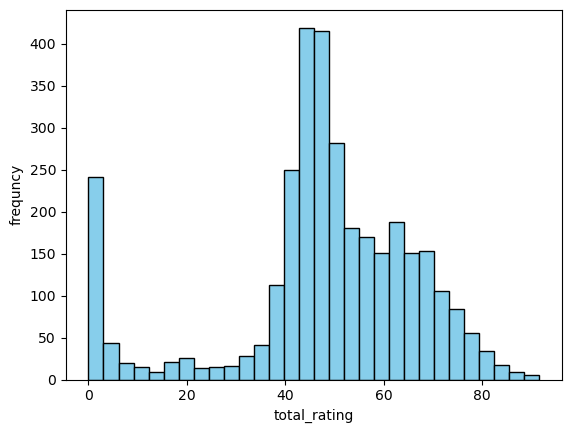

In [64]:
plt.hist(df_uniqune["total_rating"], bins=30, color='skyblue',edgecolor="black" )
plt.xlabel("total_rating")
plt.ylabel("frequncy")
plt.show()

In [23]:
print(df_inx.loc[["Rockstar Games","Marvelous Europe Limited"]])

                                                                           game_name  \
publisher                total_rating                                                  
Rockstar Games           50.641723                             Red Dead Redemption 2   
                         50.641021                                   Red Dead Online   
                         66.548236                                Grand Theft Auto 3   
                         56.534369                                Grand Theft Auto V   
                         88.701572                               Red Dead Redemption   
                         77.034473                  GRAND THEFT AUTO: CHINATOWN WARS   
                         59.224135                                       L. A. Noire   
                         65.071660                                        L.A. Noire   
                         69.840000                                         Max Payne   
                         50.0537

In [24]:
print(df_inx.sort_index)

<bound method DataFrame.sort_index of                                                              game_name  \
publisher                   total_rating                                 
Rockstar                    47.330579              Grand Theft Auto IV   
Rockstar Games              50.641723            Red Dead Redemption 2   
                            50.641021                  Red Dead Online   
                            66.548236               Grand Theft Auto 3   
                            56.534369               Grand Theft Auto V   
...                                                                ...   
Marvelous Europe Limited    47.264111     SENRAN KAGURA Burst Re:Newal   
TRIANGULAR PIXELS LTD       56.871429                Smash Hit Plunder   
ASTRAGON ENTERTAINMENT GMBH 52.126866                    FOX n FORESTS   
Koei Tecmo Europe Ltd       35.058503               DYNASTY WARRIORS 9   
Badland Publishing          57.941176                      Vostok Inc.   


In [25]:
print(df_inx.sort_index(level=["publisher","total_rating"],ascending=[False, True]))

                                                       game_name  \
publisher               total_rating                               
ustwo games limited     82.754153                Monument Valley   
unknown                 31.802549                 Road Not Taken   
                        42.676074              Operation Warcade   
                        42.678922                    Iconoclasts   
                        42.855029     Project Nimbus: Code Mirai   
...                                                          ...   
10Tons Ltd.             39.947696             Tennis in the Face   
                        47.527273          Tesla Force PS4 & PS5   
                        NaN                   Tesla vs Lovecraft   
101XP LTD               69.200000              The Darkest Tales   
(Subli)minal Gaming LLC NaN                          Button City   

                                      highest_price  release_date  \
publisher               total_rating          

In [26]:
print(rating_genre.loc["Rockstar Games":"Badland Publishing"])

Empty DataFrame
Columns: [--, Action, Action / Adventure, Action / Adventure / Arcade, Action / Adventure / Arcade / Brain training, Action / Adventure / Casual, Action / Adventure / Family, Action / Adventure / Horror, Action / Adventure / Horror / Adult, Action / Adventure / Music/rhythm, Action / Adventure / Music/rhythm / Family, Action / Adventure / Party / Casual, Action / Adventure / Simulation, Action / Adventure / Simulator, Action / Adventure / Strategy, Action / Adventure / Unique, Action / Adventure / Unique / Casual, Action / Arcade, Action / Arcade / Casual, Action / Arcade / Horror, Action / Arcade / Party, Action / Arcade / Racing, Action / Arcade / Sports, Action / Arcade / Strategy, Action / Arcade / Unique, Action / Casual, Action / Family, Action / Horror, Action / Horror / Strategy, Action / Horror / Unique, Action / Music/rhythm, Action / Music/rhythm / Family, Action / Party, Action / Party / Casual / Family, Action / Party / Family, Action / Racing, Action / Rac

In [27]:
rating_genre.mean(axis="columns") 
rating_genre.mean(axis="index") 

genre
--                                               2.341753
Action                                           9.909509
Action / Adventure                               8.821494
Action / Adventure / Arcade                      1.153862
Action / Adventure / Arcade / Brain training     0.157904
                                                  ...    
Strategy / Unique / Family                       0.229405
Unique                                           2.724204
Unique / Casual                                  0.169638
Unique / Family                                  0.227210
All                                             54.458134
Length: 271, dtype: float64

In [28]:
game_str= df_inx.sort_index()
game_str

game_name  \
publisher               total_rating                                
(Subli)minal Gaming LLC NaN                           Button City   
101XP LTD               69.200000               The Darkest Tales   
10Tons Ltd.             39.947696              Tennis in the Face   
                        47.527273           Tesla Force PS4 & PS5   
                        NaN                    Tesla vs Lovecraft   
...                                                           ...   
unknown                 78.027610                         IKARUGA   
                        NaN           Q.U.B.E. 2 Ultimate Edition   
                        NaN           GUNVOLT RECORDS Cychronicle   
                        NaN                    Salt and Sacrifice   
ustwo games limited     82.754153                 Monument Valley   

                                      highest_price  release_date  \
publisher               total_rating                                
(Subli)minal Gaming LLC NaN                      20  Aug 10, 2021   
101XP LTD               69.200000                20  Nov 10, 2022   
10Tons Ltd.             39.947696                 5  Nov 12, 2014   
                        47.527273                15  Nov 24, 2020   
                        NaN                      18   Dec 4, 2020   
...                                             ...           ...   
unknown                 78.027610                10  Jun 29, 2018   
                        NaN                      27  Jan 20, 2023   
                        NaN                      13  Feb 15, 2024   
                        NaN                      16  May 10, 2022   
ustwo games limited     82.754153                10  Apr 15, 2025   

                                                            genre   platform  \
publisher               total_rating                                           
(Subli)minal Gaming LLC NaN                                    --        PS5   
101XP LTD               69.200000     Action / Adventure / Horror        PS4   
10Tons Ltd.             39.947696                          Puzzle        PS4   
                        47.527273       Action / Shooter / Arcade  PS5 / PS4   
                        NaN                                    --        PS5   
...                                                           ...        ...   
unknown                 78.027610                         Shooter        PS4   
                        NaN                                    --        PS5   
                        NaN                                    --        PS5   
                        NaN           Action / Role playing games  PS5 / PS4   
ustwo games limited     82.754153                          Puzzle  PS5 / PS4   

                                      metacritic_score  \
publisher               total_rating                     
(Subli)minal Gaming LLC NaN                       66.0   
101XP LTD               69.200000                 74.0   
10Tons Ltd.             39.947696                 68.0   
                        47.527273                 67.0   
                        NaN                       71.0   
...                                                ...   
unknown                 78.027610                 85.0   
                        NaN                       76.0   
                        NaN                       72.0   
                        NaN                       72.0   
ustwo games limited     82.754153                 89.0   

                                      metacritic_rating_count  \
publisher               total_rating                            
(Subli)minal Gaming LLC NaN                              10.0   
101XP LTD               69.200000                         4.0   
10Tons Ltd.             39.947696                         9.0   
                        47.527273                         5.0   
                        NaN                               4.0   
...      

In [29]:
print(game_str.loc["Rockstar Games":"Marvelous Europe Limited	"])

Empty DataFrame
Columns: [game_name, highest_price, release_date, genre, platform, metacritic_score, metacritic_rating_count, metacritic_user_score, metacritic_user_rating_count, playstation_score, playstation_rating_count, total_users, user_score_100, playstation_score_100, isfree]
Index: []
